In [13]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# import the dataset
df = pd.read_csv("students by age.csv",delimiter=';',encoding='cp1251')
df

,age,name,man,woman
0,моложе 15 лет,Алтайский край,0,0
1,моложе 15 лет,Амурская область,0,0
2,моложе 15 лет,Архангельская область,0,0
3,моложе 15 лет,Астраханская область,0,0
4,моложе 15 лет,Белгородская область,1,0
...,...,...,...,...
1591,40 лет и старше,Чеченская Республика,193,130
1592,40 лет и старше,Чувашская Республика,637,683
1593,40 лет и старше,Чукотский автономный округ,4,2
1594,40 лет и старше,Ямало-Ненецкий автономный округ,15,1


In [15]:
# defining two arrays with the name of the unique age groups and the unique regions
ages = df.age.unique()
regions= df.name.unique()

In [16]:
# taking columns number [1,2,4] of the dataset into a numpy array
X_women = df.iloc[:,[0,1,3]].values
# defining a dictionary with the key "age" which contains an array of the required age groups for
# this study (15-29)
d_women ={"age": np.linspace(15,29,15)}
# adding empty keys to the dictionary each key represnts a region in Russia.
for i in regions:
    d_women[i] = []
# filling the list of each region with number of students from the dataset
for i in range(1596):
    ID=int(np.where(ages== X_women[i,0])[0])
    if ID>0 and ID<16:
        ID_2 = X_women[i,1]
        d_women[ID_2].append(float(X_women[i,2]))
d_women = pd.DataFrame(d_women)

In [17]:
d_women

,age,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,Вологодская область,...,Удмуртская Республика,Ульяновская область,Хабаровский край,Ханты-Мансийский автономный округ,Челябинская область,Чеченская Республика,Чувашская Республика,Чукотский автономный округ,Ямало-Ненецкий автономный округ,Ярославская область
0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,1.0,0.0,0.0,19.0,3.0,1.0,2.0,7.0,0.0,...,1.0,2.0,1.0,0.0,3.0,23.0,0.0,0.0,0.0,1.0
2,17.0,428.0,123.0,71.0,476.0,391.0,199.0,170.0,589.0,52.0,...,398.0,179.0,263.0,101.0,354.0,1515.0,201.0,0.0,0.0,198.0
3,18.0,3359.0,808.0,1009.0,1333.0,2630.0,915.0,1166.0,3077.0,868.0,...,2154.0,1588.0,2214.0,1077.0,4032.0,2214.0,1441.0,1.0,0.0,2185.0
4,19.0,3580.0,897.0,1190.0,1721.0,2709.0,1379.0,1508.0,3731.0,1171.0,...,2567.0,1944.0,2450.0,1404.0,4953.0,2930.0,2000.0,0.0,0.0,2007.0
5,20.0,4191.0,1206.0,1237.0,2051.0,3359.0,1520.0,1864.0,4311.0,1303.0,...,2955.0,2397.0,2820.0,1599.0,6052.0,2862.0,2403.0,1.0,0.0,2614.0
6,21.0,4345.0,1162.0,1325.0,2024.0,3238.0,1593.0,2000.0,4416.0,1393.0,...,3160.0,2521.0,2928.0,1589.0,6585.0,2150.0,2777.0,2.0,1.0,2677.0
7,22.0,3309.0,927.0,1008.0,1671.0,3535.0,1224.0,1477.0,3692.0,1189.0,...,2748.0,2168.0,2162.0,1272.0,5500.0,1913.0,2175.0,1.0,0.0,2270.0
8,23.0,2610.0,679.0,895.0,1235.0,2492.0,937.0,1080.0,2571.0,910.0,...,1943.0,1596.0,1590.0,944.0,4192.0,1459.0,1519.0,2.0,2.0,1628.0
9,24.0,1538.0,465.0,496.0,735.0,1081.0,578.0,664.0,1510.0,593.0,...,1030.0,1004.0,979.0,560.0,2815.0,840.0,1018.0,1.0,2.0,1070.0


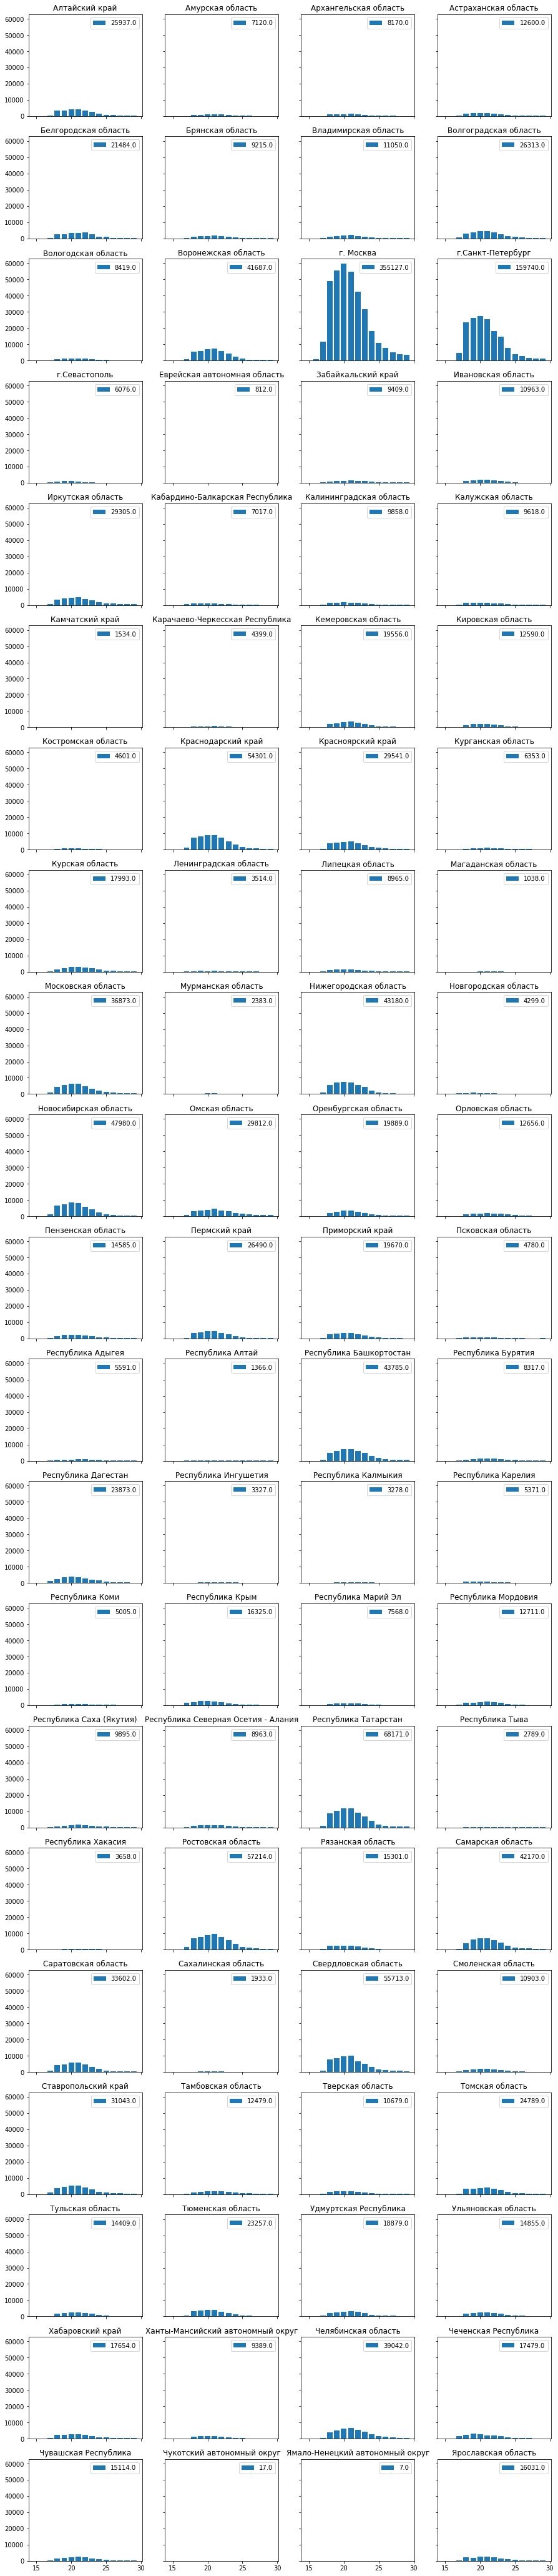

In [18]:
# plotting the distribution of the female students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    #axis[l, j].bar(d_men.age[1:15], d_men.iloc[1:15,i])
    leg=d_women[regions[i-1]].sum()
    axis[l, j].bar(d_women.age, d_women.iloc[:,i],label=leg)
    
    axis[l, j].legend(loc ="upper right")

i=0    
for ax in axis.flat:
    ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()

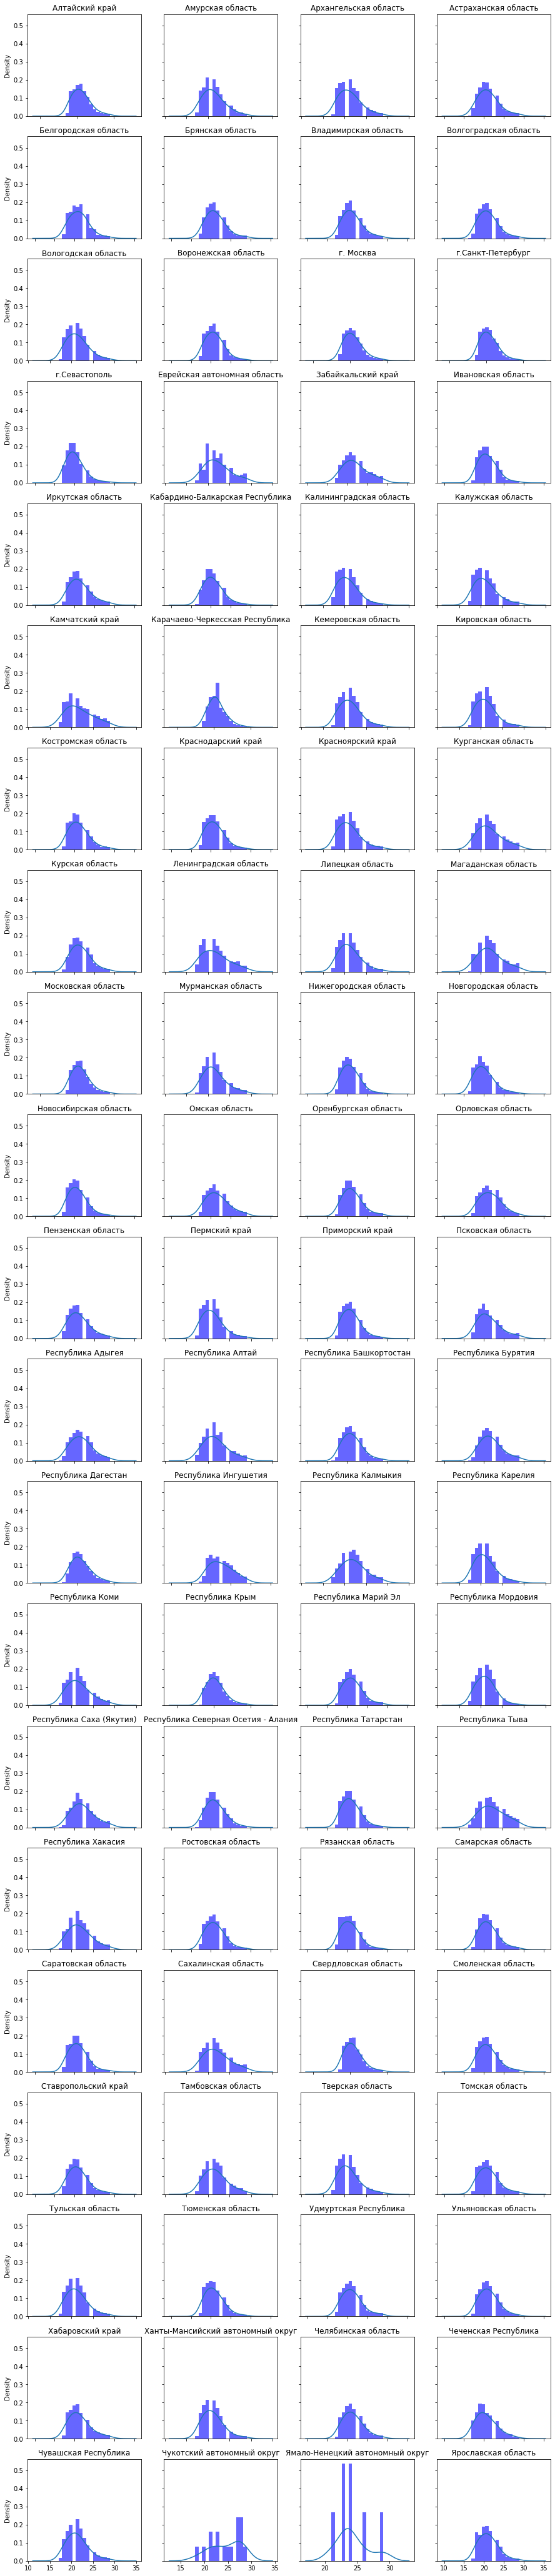

In [19]:
#plotting the density curve of female students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    a = pd.Series(d_women.age.repeat(d_women.iloc[:,i]))
    a.plot.kde(ax=axis[l, j],bw_method=0.5)
    axis[l, j].hist(a,bins=15, density=True, alpha=0.6, color='b')

i=0    
for ax in axis.flat:
    ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()